<a href="https://colab.research.google.com/github/Madhukargoud2197/Customer-Complaint-Analysis/blob/main/Customer_Complaint_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EDA & Text Preprocessing:**

Remove any irrelevant columns or entries & handle any missing or null values.

Explore the distribution of products/services in the dataset.

Analyze the length distribution of customer narratives.

Perform text preprocessing if necessary (e.g., stop word removal, lowercasing, punctuation removal, double space removal, tokenization).

Identify the most common words or phrases used in the narratives.

Investigate whether certain products or services receive more complaints than others.

Use graphs (e.g., bar plots, word clouds, histograms) to illustrate the distribution of products, the frequency of complaints, etc. and summarize your findings from the analysis.

Encode the labels in preparation for training

Check for class imbalance and address this.

Split the dataset into training and validation sets (e.g., 80/20 split).

In [175]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn import preprocessing
# Ignore FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [176]:
path = ("/content/complaints.csv")


In [177]:
df= pd.read_csv(path)

In [178]:
df.head(5)

,complaint_no,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [179]:
# lets drop the complaint no column in the dataset as we have no use of it relavent to the project
df.drop('complaint_no', axis=1, inplace=True)


In [180]:
df.head(5)

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [181]:
df.shape

(162421, 2)

In [182]:
# Looking for empty documents & Removing them
total_nulls = df[df.narrative.str.strip() == " "].shape[0]
print("Empty documents:", total_nulls)

Empty documents: 0


In [183]:
# Remove records with no text content if there be any in the future
df = df[~(df.narrative.str.strip() == " ")]

In [184]:
#Lets check for any missing values
df.isnull().sum()

,0
product,0
narrative,10


In [185]:
# Looks like we have nearly 10 missing values in the narrative feature, lets remove them
df.dropna(inplace=True)


In [186]:
# Lets check if those missing values are removed
df.isnull().sum()

,0
product,0
narrative,0


In [187]:
# Lets get the statistical summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162411 entries, 0 to 162420
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    162411 non-null  object
 1   narrative  162411 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


#### **Exploratory data analysis**

product
credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
credit_card            15566
retail_banking         13535
Name: count, dtype: int64


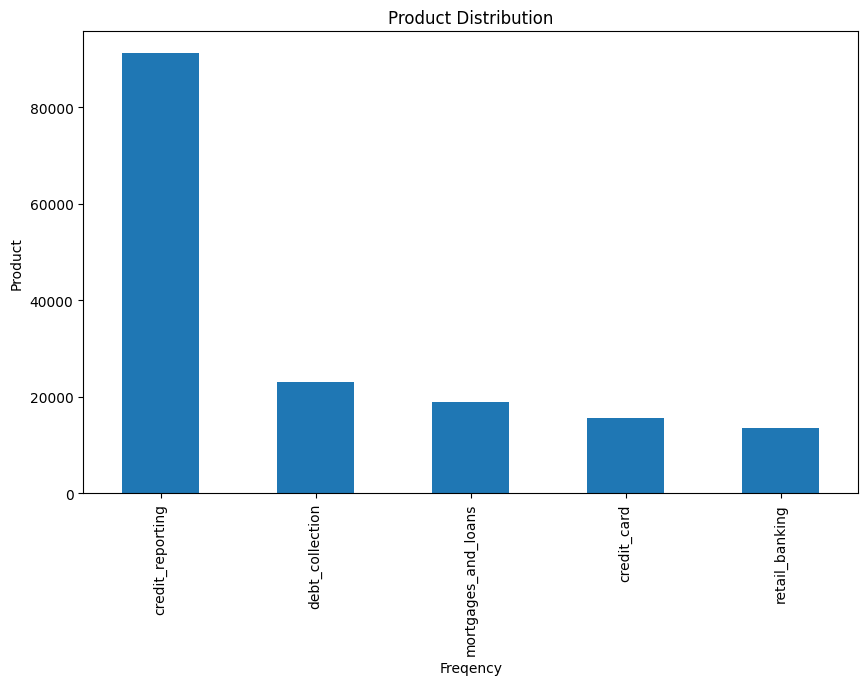

In [188]:
# Lets understand the distribution of the products in the dataset and compute the product of each service in the distribution
product_count = df['product'].value_counts()
print(product_count)
# lets visulalize the distribution
plt.figure(figsize=(10, 6))
product_count.plot(kind='bar')
plt.title('Product Distribution')
plt.xlabel('Freqency')
plt.ylabel('Product')
plt.show()

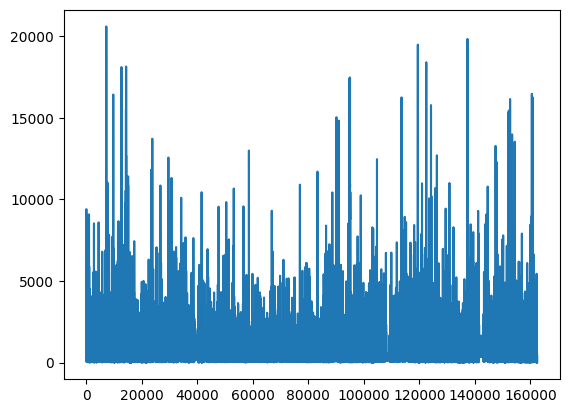

In [189]:
# Lets understand only the length of each narrative with a plot
word_lengths = [len(x) for x in df['narrative']]
plt.plot(word_lengths)

0         1705
1          904
2         1230
3          903
4          851
          ... 
162416       4
162417       4
162418       4
162419       4
162420       4
Name: narrative, Length: 162411, dtype: int64


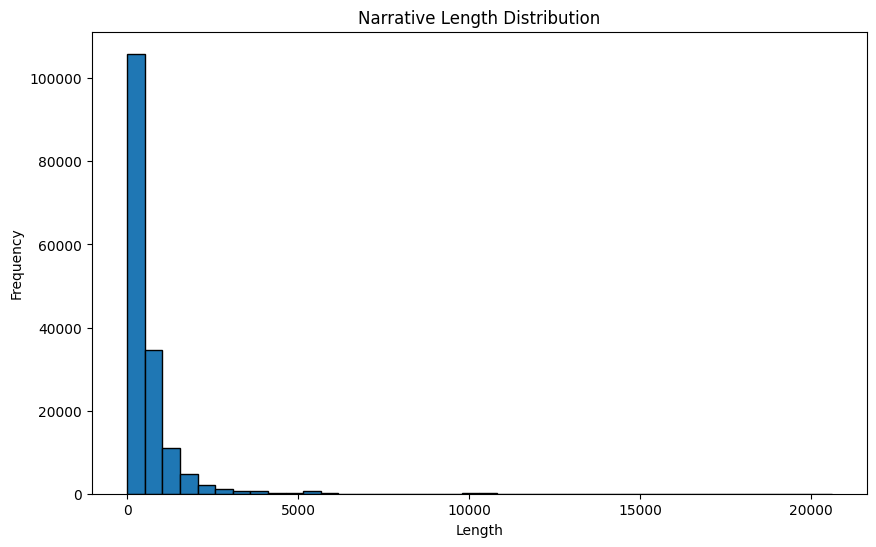

In [190]:
# Lets understand the Distribution of each narrative in the dataset
word_length = df['narrative_len'] = df['narrative'].apply(len)
print(word_length)

# Lets visualize this
plt.figure(figsize=(10, 6))
plt.hist(word_length, bins=40, edgecolor='k')
plt.title('Narrative Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

#### **Text Preprocessing**

Text preprocessing general involves these following steps

* Stop word removal
* Lowercasing
* Punctuation removal
* Double space removal(if any)
* Tokenization.

In [191]:
# Installing the required libraries
!pip install nltk
!pip install contractions
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import contractions

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [192]:
# Lets remove the punctutions from the dataframe using regular expression
# import regular expression
import re

# Lets create an function to remove punctuations using the reg ex functions
def remove_punctuations(text):
    # Ensure the input is a string before applying regex
    text = str(text)
    return re.sub('[^a-zA-Z.,!:;]', ' ', text)

# This will now be applied before tokenization
df['narrative'] = df['narrative'].apply(remove_punctuations)

In [193]:
# lets check if punctuations are removed from narratives
df['narrative'][1]

'forwarded message date tue subject please investigate comenity bank retailer card scam sent hello name scammed comenity bank credit card provider company childrens place new york forever victoria secret original credit comenity bank lower limit began charge overage fee along late fee began pay close attention card find limit also changed well incurring overage late fee reached company comenity bank stated would change credit limit original limit reached told summit payment account corrected comenity bank credit card impacted credit score plummeted negative status im currently paying price due corruption affected detrimental way debt due company charging overage fee well late fee even initial credit limit fluctuating tremendously company charge major fee account willing correct account nervous said attorney reason im reaching im employee company ruining credit plz help name contact info thank'

In [194]:
# Lets convert all the upper case letters to lowercases
df['narrative'] = df['narrative'].str.lower()

In [195]:
# Lets remove spaces
df['narrative'] = df['narrative'].str.strip()
# Lets also remove double spaces
df['narrative'] = df['narrative'].str.replace(' +', ' ')

In [196]:
# Lets remove contractions
df['narrative'] = df['narrative'].apply(lambda x: contractions.fix(x))

In [197]:
# Finally lets remove the stopwords
stop_words = set(stopwords.words('english'))
df['narrative'] = df['narrative'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [198]:
df.head(10)

,product,narrative,narrative_len
0,credit_card,purchase order day shipping amount receive pro...,1705
1,credit_card,forwarded message date tue subject please inve...,904
2,retail_banking,forwarded message cc sent friday pdt subject f...,1230
3,credit_reporting,payment history missing credit report speciali...,903
4,credit_reporting,payment history missing credit report made mis...,851
5,credit_reporting,payment history missing credit report made mis...,849
6,credit_reporting,va date complaint experian credit bureau invol...,1395
7,credit_reporting,account reported abbreviated name full name se...,2114
8,credit_reporting,account reported abbreviated name full name se...,2120
9,credit_reporting,usdoexxxx account reported abbreviated name fu...,2093


In [199]:
# Looks like i have created an additional column of narrative len
# lets remove that column
df.drop('narrative_len', axis=1, inplace=True)

In [200]:
df.head()

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


#### **TOKENIZATION**

In [201]:
#Lets define a function for tokenization of texts
def tokenize_text(text):
  words = nltk.word_tokenize(text)
  return words

In [202]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [203]:
# Lets call the function and use it on the narrative after punctuation removal
df['narrative'] = df['narrative'].apply(remove_punctuations).apply(lambda x: tokenize_text(x))
df['narrative']

,narrative
0,"[purchase, order, day, shipping, amount, recei..."
1,"[forwarded, message, date, tue, subject, pleas..."
2,"[forwarded, message, cc, sent, friday, pdt, su..."
3,"[payment, history, missing, credit, report, sp..."
4,"[payment, history, missing, credit, report, ma..."
...,...
162416,[name]
162417,[name]
162418,[name]
162419,[name]


#### **LEMMATIZATION**

In [204]:
# Lets import the libraries
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Lets create an lemma variable and assign the lemmatizer
lemma = WordNetLemmatizer()

# Now lets define a function for lemmatization of narrative feature
def lemmatize_words(text):
  return [lemma.lemmatize(word=w, pos='v') for w in text]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [205]:
# Lets call the function and apply to our narrative now
df['narrative'] = df['narrative'].apply(lambda x: lemmatize_words(x))
df['narrative']

,narrative
0,"[purchase, order, day, ship, amount, receive, ..."
1,"[forward, message, date, tue, subject, please,..."
2,"[forward, message, cc, send, friday, pdt, subj..."
3,"[payment, history, miss, credit, report, speci..."
4,"[payment, history, miss, credit, report, make,..."
...,...
162416,[name]
162417,[name]
162418,[name]
162419,[name]


We could also have used Stemming but, Stemming can lead to some words being reduced to meaningless words, so we did not use it here.

Most Common Words:
account: 326912
credit: 321654
report: 306821
information: 143538
payment: 127725
call: 109710
receive: 99288
send: 86733
pay: 86657
dispute: 85084


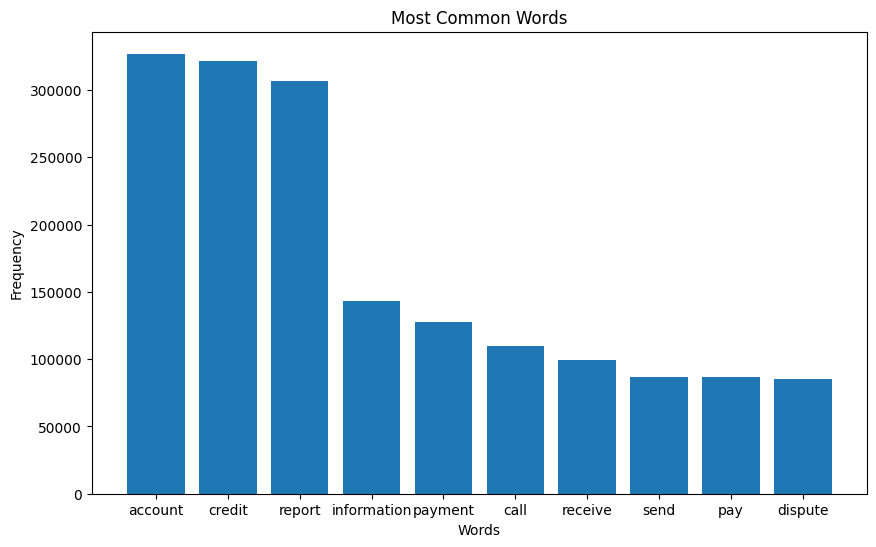

In [206]:
# Lets understand the most common words or phrases used in the narratives

# importing a required library Counter
from collections import Counter
import itertools

# Lets first flatten the tokenized and lemmatized words
all_words = list(itertools.chain.from_iterable(df['narrative']))

# Lets Count the occurences of each word now
word_counts = Counter(all_words)

# Lets get the most common words
most_common_words = word_counts.most_common(10)

# Lets Print the most common words and their frequencies
print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Lets visualize the most common words now
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_words))
plt.title('Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


product
credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
credit_card            15566
retail_banking         13535
Name: count, dtype: int64


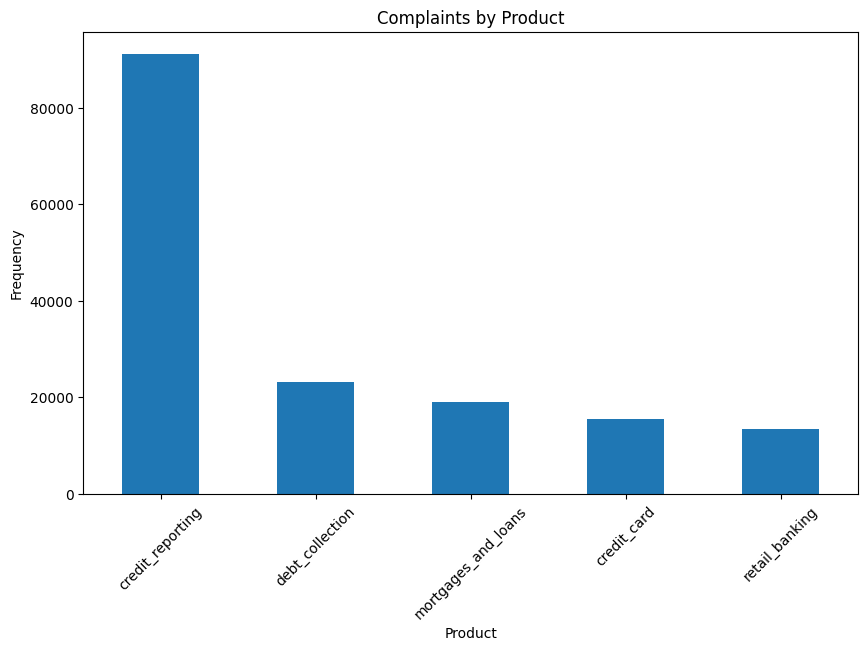

In [207]:
# Lets understand which product type receive more complaints than the others

# Lets count the complaints of product categories
complaints_products = df['product'].value_counts()
print(complaints_products)

# Lets visualize this
plt.figure(figsize=(10, 6))
complaints_products.plot(kind='bar')
plt.title('Complaints by Product')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Its clearly understandble from the above graph that credit reporting has a lot more complaints compared to the other categories which explains that the data is imbalanced and we need to address that to prevent the data imbalance, and here we shall try to address this issue using **Over Sampling**

In [208]:
# Lets visualize the most common words using wordcloud
!pip install wordcloud

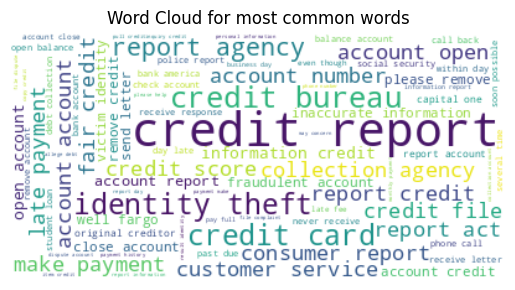

In [209]:
# Lets create the visualizaiton of word cloud for most common words in the narratives
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wordcloud = WordCloud(background_color="white").generate(' '.join(all_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for most common words")
plt.axis("off")
plt.show()

#### Addressing the imbalance in the data

In [210]:
# Lets randomly selecting 8000 indices in the categories with low value count and use them for oversampling
import numpy as np
New_credit_card = np.random.choice(df[df['product']== 'credit_card'].index, size = 8000, replace = False)
New_debt_collection = np.random.choice(df[df['product']== 'debt_collection'].index, size = 8000, replace = False)
New_retail_banking = np.random.choice(df[df['product']== 'retail_banking'].index, size = 8000, replace = False)
New_mortgage_and_loans = np.random.choice(df[df['product']== 'mortgages_and_loans'].index, size = 8000, replace = False)

In [211]:
# Lets form a list of the above new indices and then update the dataset
New_list = np.concatenate((New_credit_card, New_debt_collection, New_retail_banking, New_mortgage_and_loans))
len(New_list)

32000

In [213]:
# Creating a new dataframe for the randomized indices
df_new = df[df.index.isin(New_list)]
df_new

,product,narrative
10,mortgages_and_loans,"[begin, mortgage, hold, mb, financial, mb, mor..."
12,credit_card,"[capital, one, secure, credit, account, open, ..."
14,debt_collection,"[collection, agency, system, inc, mn, phone, s..."
17,mortgages_and_loans,"[close, mortgage, dovenmuhle, mortgage, pay, f..."
22,mortgages_and_loans,"[convert, lease, vehicle, three, month, lease,..."
...,...,...
162396,retail_banking,"[new, policy, make, noy, connect, mu, account,..."
162404,mortgages_and_loans,"[software, automatically, delete, number, prof..."
162409,retail_banking,"[yr, thru, expect, monies, account, deposit, d..."
162417,credit_card,[name]


In [214]:
# Now concatinating the new df with the existing df
df_new = pd.concat([df, df_new])

In [216]:
df_new.head()

,product,narrative
0,credit_card,"[purchase, order, day, ship, amount, receive, ..."
1,credit_card,"[forward, message, date, tue, subject, please,..."
2,retail_banking,"[forward, message, cc, send, friday, pdt, subj..."
3,credit_reporting,"[payment, history, miss, credit, report, speci..."
4,credit_reporting,"[payment, history, miss, credit, report, make,..."


One last step before we proceed to model building is label encoding fot the product categories.

#### Label Encoding

In [218]:
# Lets create a product column variable for the categories and encode them respectively with labels
product_column = ['credit_card', 'debt_collection','credit_reporting', 'retail_banking', 'mortgages_and_loans']
for col in product_column:
  df_new['product'].replace({'credit_card': 0, 'credit_reporting': 1, 'debt_collection':2, 'mortgages_and_loans':3, 'retail_banking':4,}, inplace= True)

In [219]:
#Lets check the dataframe one final time
df_new.head(5)

,product,narrative
0,0,"[purchase, order, day, ship, amount, receive, ..."
1,0,"[forward, message, date, tue, subject, please,..."
2,4,"[forward, message, cc, send, friday, pdt, subj..."
3,1,"[payment, history, miss, credit, report, speci..."
4,1,"[payment, history, miss, credit, report, make,..."


## **Training the Data**

In [223]:
# Lets split the data into training and validation sets and train the data

#Importing the library
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing samples as X and Y variables
X= df_new['narrative']
y= df_new['product']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lets see the shape of the resulting train and validation datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (155528,) (155528,)
Testing set shape: (38883,) (38883,)


## **Model Implementation**

Before the model implementation, we need to preprocess the dataset we have with the following steps as it requires well processed data

* Tokenization: Convert the text data into sequences of tokens (words or characters).
* Padding: Ensure that all sequences have the same length by padding or truncating them as necessary.
* Word Embeddings: Represent each token as a dense vector

**BI-LSTM MODEL**

I am gonna build a BI-LSTM model for classification first.

Its good practice to add dropout layers to prevent overfitting if necessary.
Lets include a dense layer with 'Softmax' activation

In [1]:
# Lets install tenserflow
!pip install tensorflow

In [2]:
# Lets import the requires libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split